$$Y_i = b_0 + b_1 X_{1i} + b_2 X_{2i} + \epsilon_i$$

$$ARKK_i = b_0 + b_1 RLG_{i} + b_2 RLV_{i} + \epsilon_i$$

In [151]:
from pandas_datareader import data

In [152]:
arkk = data.DataReader('ARKK', 'yahoo', start='2015/01/01', end='2018/01/01')
arkk = arkk.resample('M').last().pct_change()
arkk.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.053379,0.062747,0.053379,0.062747,-0.894737,0.062747
2015-03-31,-0.029289,-0.033008,-0.032078,-0.031381,4.500000,-0.031381
2015-04-30,0.013650,0.007452,0.016571,0.005760,2.000000,0.005760
2015-05-31,0.020364,0.022190,0.012048,0.030589,-0.818182,0.030589


In [153]:
rlg = data.DataReader('^RLG', 'yahoo', start='2015/01/01', end='2018/01/01')
rlg = rlg.resample('M').last().pct_change()
rlg.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.054848,0.065096,0.057108,0.064858,NaN,0.064858
2015-03-31,-0.008511,-0.012504,-0.010409,-0.012698,NaN,-0.012698
2015-04-30,0.006959,0.000362,0.007209,0.004203,NaN,0.004203
2015-05-31,0.008198,0.015492,0.010443,0.012367,NaN,0.012367


In [154]:
rlv = data.DataReader('^RLV', 'yahoo', start='2015/01/01', end='2018/01/01')
rlv = rlv.resample('M').last().pct_change()
rlv.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.035389,0.045873,0.035446,0.045417,NaN,0.045417
2015-03-31,-0.013664,-0.016351,-0.013282,-0.015542,NaN,-0.015542
2015-04-30,0.009876,0.005633,0.010381,0.008189,NaN,0.008189
2015-05-31,0.006286,0.010673,0.007244,0.009237,NaN,0.009237


In [155]:
data = {'arkk':arkk['Adj Close'], 'rlg':rlg['Adj Close'], 'rlv':rlv['Adj Close']}

In [156]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,arkk,rlg,rlv
Date,,,
2015-01-31,NaN,NaN,NaN
2015-02-28,0.062747,0.064858,0.045417
2015-03-31,-0.031381,-0.012698,-0.015542
2015-04-30,0.005760,0.004203,0.008189
2015-05-31,0.030589,0.012367,0.009237


In [157]:
df = df.dropna()
df.head()

,arkk,rlg,rlv
Date,,,
2015-02-28,0.062747,0.064858,0.045417
2015-03-31,-0.031381,-0.012698,-0.015542
2015-04-30,0.005760,0.004203,0.008189
2015-05-31,0.030589,0.012367,0.009237
2015-06-30,-0.011391,-0.019011,-0.021908


$$H_0: b_1=0 \qquad H_0: b_2=0$$

$$H_a: b_1\neq0 \qquad H_a: b_2\neq0$$

In [158]:
import statsmodels.api as sm

In [159]:
from patsy import dmatrices

In [160]:
y, X = dmatrices('arkk ~ rlg + rlv', data=df, return_type='dataframe')

In [161]:
y.head()

,arkk
Date,
2015-02-28,0.062747
2015-03-31,-0.031381
2015-04-30,0.005760
2015-05-31,0.030589
2015-06-30,-0.011391


In [162]:
X.head()

,Intercept,rlg,rlv
Date,,,
2015-02-28,1.0,0.064858,0.045417
2015-03-31,1.0,-0.012698,-0.015542
2015-04-30,1.0,0.004203,0.008189
2015-05-31,1.0,0.012367,0.009237
2015-06-30,1.0,-0.019011,-0.021908


In [163]:
y = df['arkk']

In [164]:
X = df[['rlg', 'rlv']]

In [165]:
y.head()

Date
2015-02-28    0.062747
2015-03-31   -0.031381
2015-04-30    0.005760
2015-05-31    0.030589
2015-06-30   -0.011391
Freq: M, Name: arkk, dtype: float64

In [166]:
X.head()

,rlg,rlv
Date,,
2015-02-28,0.064858,0.045417
2015-03-31,-0.012698,-0.015542
2015-04-30,0.004203,0.008189
2015-05-31,0.012367,0.009237
2015-06-30,-0.019011,-0.021908


In [167]:
X = sm.add_constant(X)

In [168]:
X.head()

,const,rlg,rlv
Date,,,
2015-02-28,1.0,0.064858,0.045417
2015-03-31,1.0,-0.012698,-0.015542
2015-04-30,1.0,0.004203,0.008189
2015-05-31,1.0,0.012367,0.009237
2015-06-30,1.0,-0.019011,-0.021908


In [169]:
model = sm.OLS(y, X)

In [170]:
results = model.fit()

In [171]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   arkk   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     21.72
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           9.57e-07
Time:                        12:07:13   Log-Likelihood:                 64.155
No. Observations:                  36   AIC:                            -122.3
Df Residuals:                      33   BIC:                            -117.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.008      0.445      0.659      -0.012       0.019
rlg            2.1074      0.444      4.750      0.000       1.205       3.010
rlv           -0.7546      0.472     -1.598      0.120      -1.715       0.206
==============================================================================
Omnibus:                        1.781   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                0.788
Skew:                          -0.098   Prob(JB):                        0.674
Kurtosis:                       3.698   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$t = \frac {\hat b_1-b_1}{s_{\hat b_1}}$$

$$t = \frac {\hat b_2-b_2}{s_{\hat b_2}}$$

In [172]:
results.params[1]

2.1073878543653377

In [173]:
results.params[2]

-0.7546398259436365

In [174]:
dof = 33

In [175]:
from scipy import stats

In [176]:
stats.t.isf(0.025, dof)

2.0345152974493383

In [177]:
(results.params[1]-0)/results.bse[1]

4.750475992140546

In [178]:
(results.params[2]-0)/results.bse[2]

-1.5979206970302322

# Heteroskedasticity

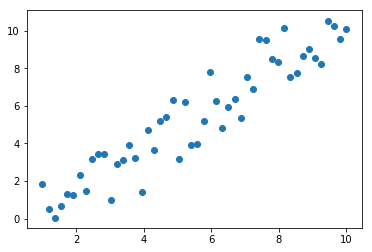

In [179]:
import matplotlib.pyplot as plt
import numpy as np
z = np.linspace(1, 10, 50)
a = []
for i in z:
    v = i + np.random.normal()
    a.append(v)
plt.scatter(z, a)

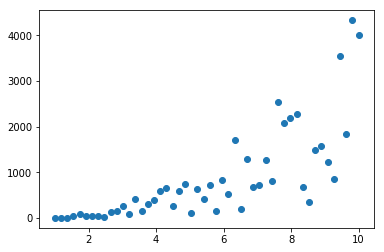

In [180]:
z = np.linspace(1, 10, 50)
a = []
c = 1
for i in z:
    v = i*c*np.random.randint(low=1, high=10)
    a.append(v)
    c =  c + 1
plt.scatter(z, a)

## Breusch Pagan Test

$$nR^2$$

$$df = number \ of \  IVs$$

In [181]:
X.head()

,const,rlg,rlv
Date,,,
2015-02-28,1.0,0.064858,0.045417
2015-03-31,1.0,-0.012698,-0.015542
2015-04-30,1.0,0.004203,0.008189
2015-05-31,1.0,0.012367,0.009237
2015-06-30,1.0,-0.019011,-0.021908


In [182]:
residuals = results.resid**2

In [183]:
model_2 = sm.OLS(residuals, X)

In [184]:
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.499
Date:                Tue, 10 Sep 2019   Prob (F-statistic):             0.0976
Time:                        12:07:24   Log-Likelihood:                 164.06
No. Observations:                  36   AIC:                            -322.1
Df Residuals:                      33   BIC:                            -317.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.000      3.445      0.002       0.001       0.003
rlg            0.0415      0.028      1.500      0.143      -0.015       0.098
rlv           -0.0633      0.029     -2.151      0.039      -0.123      -0.003
==============================================================================
Omnibus:                       22.973   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.270
Skew:                           1.780   Prob(JB):                     3.62e-08
Kurtosis:                       6.189   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
36 * 0.132

4.752000000000001

In [186]:
5.991

5.991

In [187]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(results.resid, results.model.exog)
bp_test

(4.734521441525649, 0.093737147134451, 2.498589734971425, 0.09762983732419385)

# Multicollinearity

In [188]:
df.head()

,arkk,rlg,rlv
Date,,,
2015-02-28,0.062747,0.064858,0.045417
2015-03-31,-0.031381,-0.012698,-0.015542
2015-04-30,0.005760,0.004203,0.008189
2015-05-31,0.030589,0.012367,0.009237
2015-06-30,-0.011391,-0.019011,-0.021908


In [189]:
from pandas_datareader import data
rm = data.DataReader('^GSPC', 'yahoo', start='2015/01/01', end='2018/01/01')
rm = rm.resample('M').last().pct_change()
rm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,0.044195,0.055368,0.045326,0.054893,-0.223539,0.054893
2015-03-31,-0.013579,-0.017450,-0.012710,-0.017396,-0.048157,-0.017396
2015-04-30,0.010302,0.005104,0.010302,0.008521,0.335588,0.008521
2015-05-31,0.007191,0.013140,0.007191,0.010491,-0.129120,0.010491


In [190]:
df = df.join(rm['Adj Close'])
df.head()

,arkk,rlg,rlv,Adj Close
Date,,,,
2015-02-28,0.062747,0.064858,0.045417,0.054893
2015-03-31,-0.031381,-0.012698,-0.015542,-0.017396
2015-04-30,0.005760,0.004203,0.008189,0.008521
2015-05-31,0.030589,0.012367,0.009237,0.010491
2015-06-30,-0.011391,-0.019011,-0.021908,-0.021012


In [191]:
df = df.rename(columns={'Adj Close': 'rm'})
df.head()

,arkk,rlg,rlv,rm
Date,,,,
2015-02-28,0.062747,0.064858,0.045417,0.054893
2015-03-31,-0.031381,-0.012698,-0.015542,-0.017396
2015-04-30,0.005760,0.004203,0.008189,0.008521
2015-05-31,0.030589,0.012367,0.009237,0.010491
2015-06-30,-0.011391,-0.019011,-0.021908,-0.021012


In [202]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   arkk   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     21.72
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           9.57e-07
Time:                        12:26:04   Log-Likelihood:                 64.155
No. Observations:                  36   AIC:                            -122.3
Df Residuals:                      33   BIC:                            -117.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.008      0.445      0.659      -0.012       0.019
rlg            2.1074      0.444      4.750      0.000       1.205       3.010
rlv           -0.7546      0.472     -1.598      0.120      -1.715       0.206
==============================================================================
Omnibus:                        1.781   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                0.788
Skew:                          -0.098   Prob(JB):                        0.674
Kurtosis:                       3.698   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
y_3, X_3 = dmatrices('arkk ~ rlg + rlv + rm', data=df, return_type='dataframe')

In [204]:
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   arkk   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     23.35
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           3.39e-08
Time:                        12:28:38   Log-Likelihood:                 69.911
No. Observations:                  36   AIC:                            -131.8
Df Residuals:                      32   BIC:                            -125.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0054      0.007      0.821      0.418      -0.008       0.019
rlg            9.5002      2.163      4.391      0.000       5.093      13.907
rlv            5.9648      1.978      3.016      0.005       1.936       9.993
rm           -14.2708      4.110     -3.472      0.002     -22.642      -5.899
==============================================================================
Omnibus:                        1.384   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.604
Skew:                           0.276   Prob(JB):                        0.739
Kurtosis:                       3.313   Cond. No.                         818.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
from pandas.plotting import scatter_matrix

In [206]:
import matplotlib.pyplot as plt

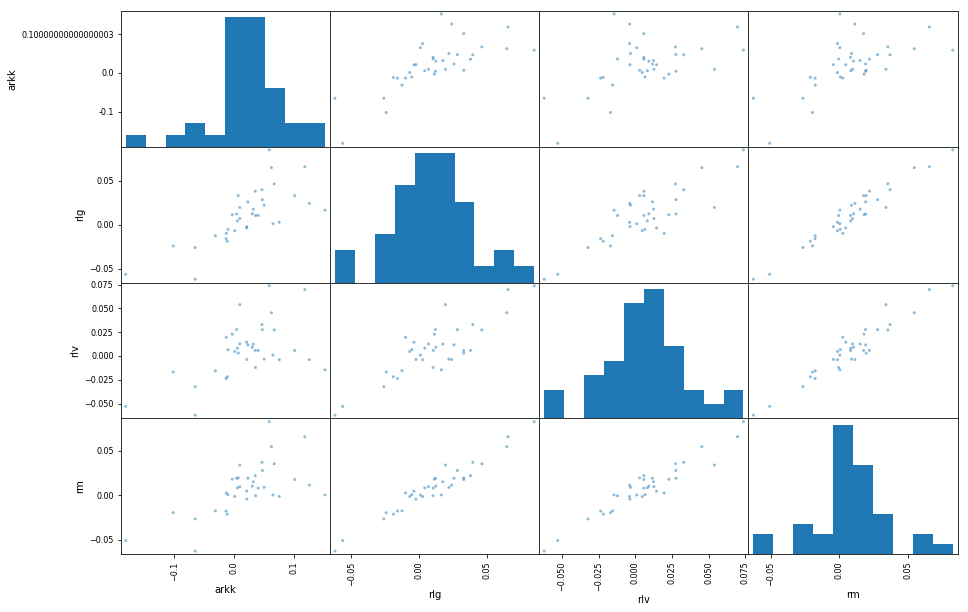

In [211]:
scatter_matrix(df[['arkk', 'rlg', 'rlv', 'rm']], figsize=(15, 10))
plt.show()